In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [154]:
#Loading the data
df = pd.read_csv(r"C:\Users\omkur\Downloads\movies.csv")

In [3]:
#Checking the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [4]:
#Getting the statistical description of the data
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [5]:
#Checking for any null values
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [155]:
#At the end of each value in votes they have a point zero to remove it 
#first we have to see are there any values except zero 
df1 = df['votes'].astype('str').str.split('.',expand=True)

In [156]:
#There are not any values except zero
df1[1].value_counts()

0    7665
Name: 1, dtype: int64

In [157]:
#checking for budget
df1 = df['budget'].astype('str').str.split('.',expand=True)

In [158]:
df1[1].value_counts()

0    5497
Name: 1, dtype: int64

In [159]:
#Checking for gross
df1 = df['gross'].astype('str').str.split('.',expand=True)
df1[1].value_counts()

0    7479
Name: 1, dtype: int64

In [160]:
df.dropna(inplace=True)

In [161]:
#Now we can change the data types
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [162]:
df['votes'] = df['votes'].astype('int64')

In [163]:
#We have released column which has united states and other countries at the end of them so we have to replace them 
df['released'] = df['released'].str.replace(r'\s\([^\)]*\)', '', regex=True)

In [164]:
#Converting released column in to a datetime data type
df['released'] = pd.to_datetime(df['released'])

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   name      5421 non-null   object        
 1   rating    5421 non-null   object        
 2   genre     5421 non-null   object        
 3   year      5421 non-null   int64         
 4   released  5421 non-null   datetime64[ns]
 5   score     5421 non-null   float64       
 6   votes     5421 non-null   int64         
 7   director  5421 non-null   object        
 8   writer    5421 non-null   object        
 9   star      5421 non-null   object        
 10  country   5421 non-null   object        
 11  budget    5421 non-null   int64         
 12  gross     5421 non-null   int64         
 13  company   5421 non-null   object        
 14  runtime   5421 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(8)
memory usage: 677.6+ KB


In [165]:
#We have a year year column which has a record of which year the movie was released but there was some mistake in the data
#so we changed it
df['year'] = df['released'].dt.year

In [122]:
#Check for duplicates
df.duplicated().sum()

0

In [ ]:
#Seeing the correlation between columns

In [ ]:
#There could be high correlation between gross and budget
#Visualization

<Axes: xlabel='budget', ylabel='gross'>

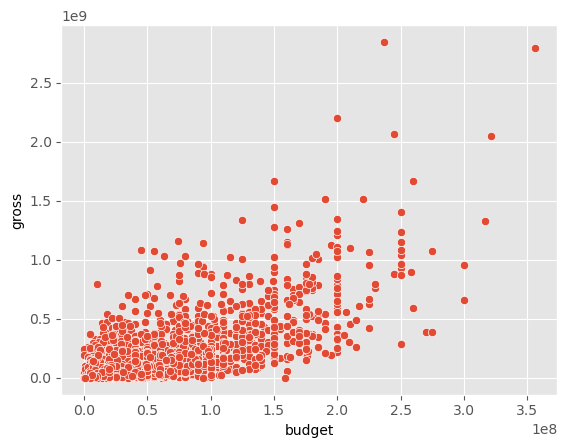

In [129]:
#Scatter plot is the plot to see correlation or the relation between numerical column
#There could be a positive negative or no relationship between the columns

sns.scatterplot(data=df,x=df['budget'],y=df['gross'])

<Axes: xlabel='budget', ylabel='gross'>

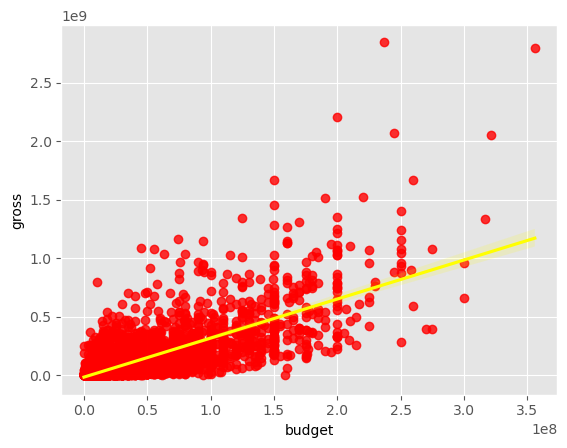

In [132]:
#Regplot

sns.regplot(data=df,x=df['budget'],y=df['gross'],scatter_kws={'color':'red'},line_kws={'color':'yellow'})

In [135]:
#There is functionn that pandas provide to us is called corr which shows the correlation between the columns 

df.corr()

C:\Users\omkur\AppData\Local\Temp\ipykernel_1952\4047354485.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,score,votes,budget,gross,runtime
year,1.000000,0.061923,0.203098,0.320312,0.268721,0.075294
score,0.061923,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.203098,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.320312,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.268721,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075294,0.414068,0.352303,0.318695,0.275796,1.000000


In [136]:
corr = df.corr()

C:\Users\omkur\AppData\Local\Temp\ipykernel_1952\658818363.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

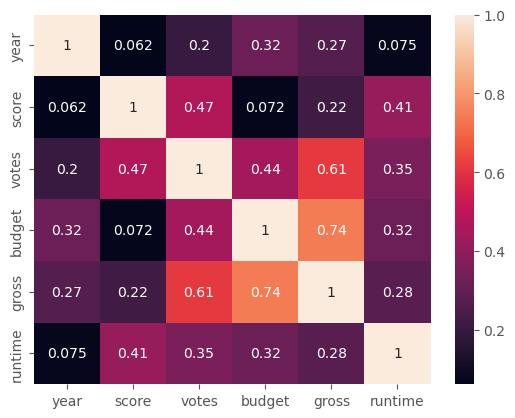

In [138]:
#Visulization

sns.heatmap(corr,annot = True)

There are three types of correlation that pandas provides us the default one is pearson and
the other two are spearman,kendall

In [139]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,1980,1980-06-13,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146.0
1,3929,6,1,1980,1980-07-02,5.8,65000,1578,1158,214,47,4500000,58853106,452,104.0
2,3641,4,0,1980,1980-06-20,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124.0
3,204,4,4,1980,1980-07-02,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88.0
4,732,6,4,1980,1980-07-25,7.3,108000,719,351,271,47,6000000,39846344,1083,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,2020-01-17,6.6,140000,16,2390,1812,47,90000000,426505244,452,124.0
7649,3556,4,0,2020,2020-02-14,6.5,102000,852,2309,147,47,85000000,319715683,1108,99.0
7650,1153,4,1,2020,2020-01-17,5.6,53000,1809,2827,1470,47,175000000,245487753,1397,101.0
7651,3978,4,1,2020,2020-02-21,6.8,42000,294,2091,640,6,135000000,111105497,12,100.0


In [141]:
df_num = df_numerized.corr()

C:\Users\omkur\AppData\Local\Temp\ipykernel_1952\2045617092.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_num = df_numerized.corr()


<Axes: >

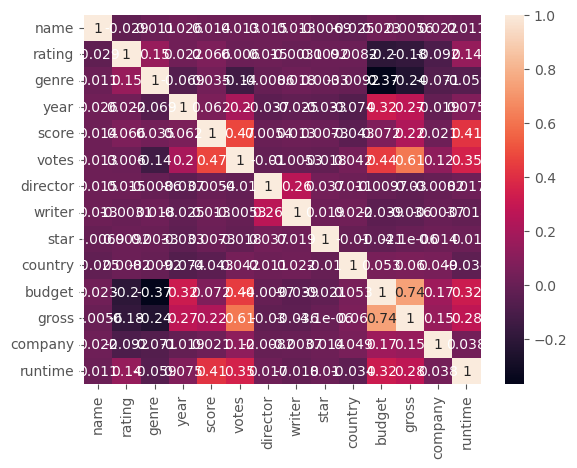

In [142]:
sns.heatmap(df_num,annot=True)

<Axes: xlabel='votes', ylabel='gross'>

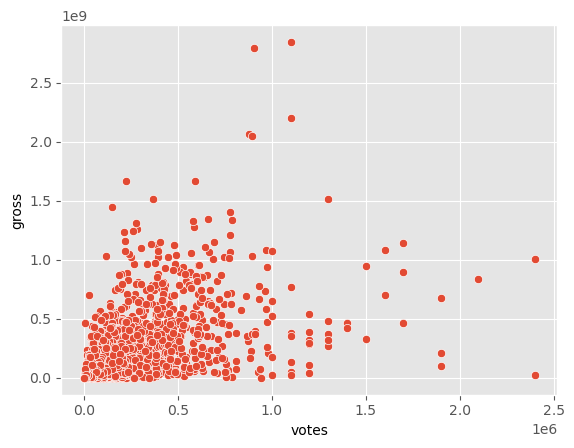

In [143]:
#Visualization
#Gross and Votes

sns.scatterplot(data=df,x=df['votes'],y=df['gross'])

<Axes: xlabel='votes', ylabel='gross'>

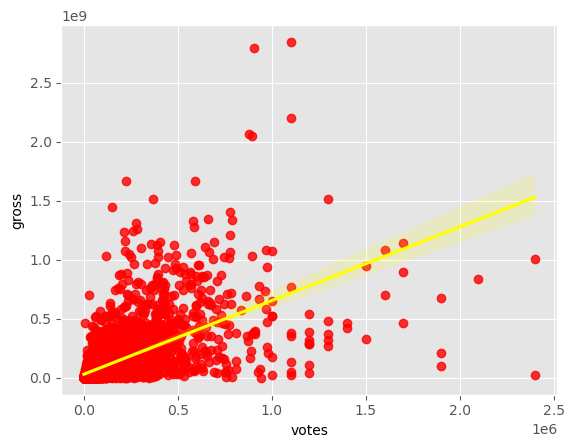

In [150]:
sns.regplot(data=df,x=df['votes'],y=df['gross'],scatter_kws={'color':'red'},line_kws={'color':'yellow'})

<Axes: xlabel='score', ylabel='gross'>

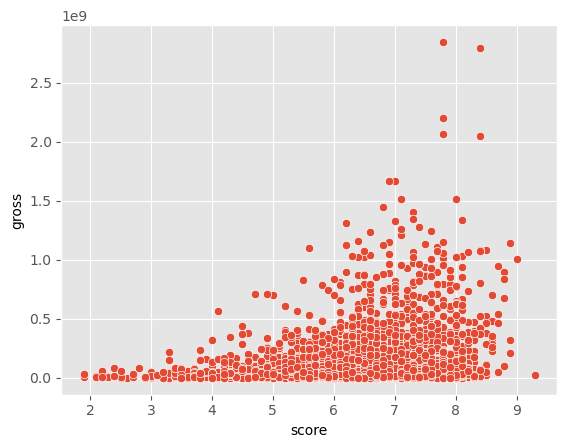

In [144]:
#Visualization
#Score and gross

sns.scatterplot(data=df,x=df['score'],y=df['gross'])

<Axes: xlabel='votes', ylabel='gross'>

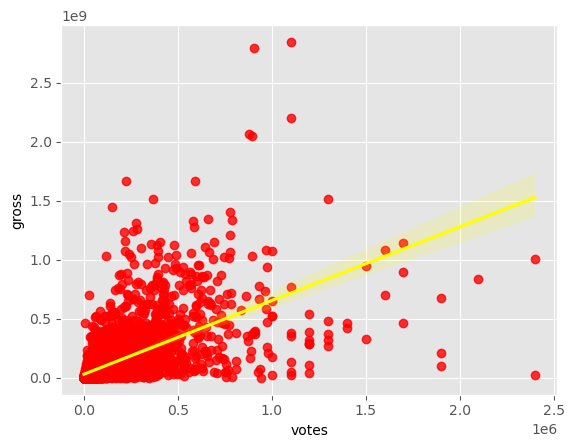

In [151]:
sns.regplot(data=df,x=df['votes'],y=df['gross'],scatter_kws={'color':'red'},line_kws={'color':'yellow'})

In [152]:
#Some more EDA

In [169]:
#Does movie rating can have a impact on gross
#The movies which donot contain a lot of adult content makes a lot of money
df.groupby('rating')['gross'].sum().sort_values(ascending=False)

rating
PG-13        266542294450
R            145199814244
PG           124929793534
G             21006223173
Not Rated       944428241
TV-MA           700083289
NC-17           191307081
Unrated          40255080
Approved         36565280
X                17186348
Name: gross, dtype: int64

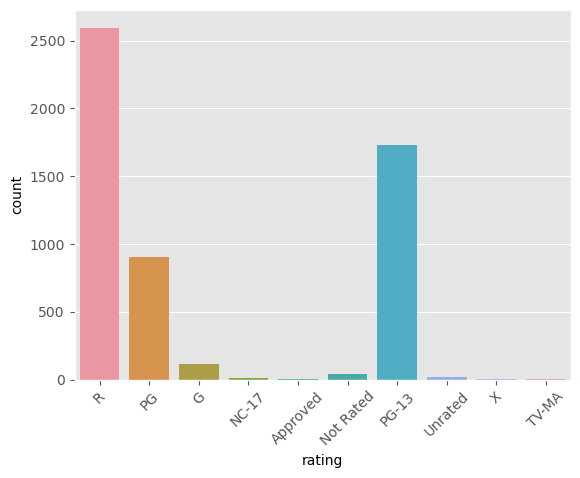

In [172]:
sns.countplot(data=df,x=df['rating'])
plt.xticks(rotation=45)
plt.show()
#this proves that despite other rated movie are more than pg-13 it still has more gross income

In [175]:
#people have different tates when it comes to movies and that taste is genre 
#Action is the most liked genre and the lowest liked is western
df.groupby('genre')['gross'].sum().sort_values(ascending=False)

genre
Action       237752868767
Comedy        88514817620
Animation     77865909110
Drama         52098564769
Adventure     43578711908
Crime         20017662162
Biography     19093930296
Horror        14261055032
Family         2074332587
Mystery        2004091467
Fantasy        1635026609
Thriller        297416988
Sci-Fi          225660614
Romance         167876905
Western          20025886
Name: gross, dtype: int64

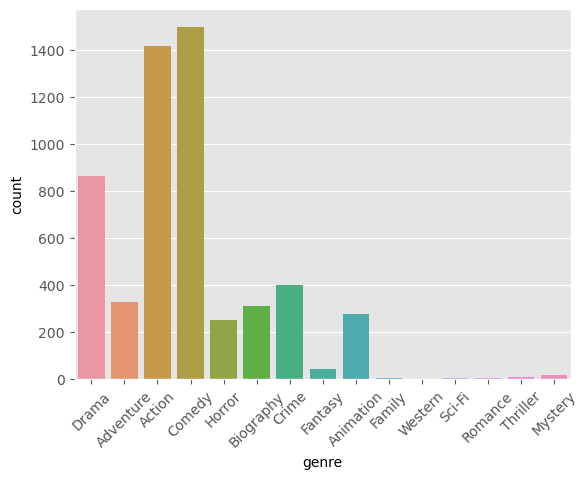

In [176]:
sns.countplot(data=df,x=df['genre'])
plt.xticks(rotation=45)
plt.show()

In [178]:
#Director can also have a huge impact on gross income
#which director has direvted most number of movies

df['director'].value_counts().sort_values(ascending=False)

Woody Allen                   33
Clint Eastwood                31
Steven Spielberg              27
Steven Soderbergh             23
Ridley Scott                  23
                              ..
Olivier Assayas                1
Kevin Greutert                 1
Andrea Arnold                  1
Agnieszka Wojtowicz-Vosloo     1
Hu Guan                        1
Name: director, Length: 2063, dtype: int64

In [254]:
#Best movie each year

best_movie = df.groupby('year')['gross'].idxmax()

In [265]:
df.loc[best_movie][['name','year','director']]

,name,year,director
2,Star Wars: Episode V - The Empire Strikes Back,1980,Irvin Kershner
92,Indiana Jones and the Raiders of the Lost Ark,1981,Steven Spielberg
209,E.T. the Extra-Terrestrial,1982,Steven Spielberg
333,Star Wars: Episode VI - Return of the Jedi,1983,Richard Marquand
481,Indiana Jones and the Temple of Doom,1984,Steven Spielberg
645,Back to the Future,1985,Robert Zemeckis
843,Top Gun,1986,Tony Scott
1057,Fatal Attraction,1987,Adrian Lyne
1247,Rain Man,1988,Barry Levinson
1443,Indiana Jones and the Last Crusade,1989,Steven Spielberg


In [266]:
#Best director each year

df.loc[best_movie][['name','year','director']]

,name,year,director
2,Star Wars: Episode V - The Empire Strikes Back,1980,Irvin Kershner
92,Indiana Jones and the Raiders of the Lost Ark,1981,Steven Spielberg
209,E.T. the Extra-Terrestrial,1982,Steven Spielberg
333,Star Wars: Episode VI - Return of the Jedi,1983,Richard Marquand
481,Indiana Jones and the Temple of Doom,1984,Steven Spielberg
645,Back to the Future,1985,Robert Zemeckis
843,Top Gun,1986,Tony Scott
1057,Fatal Attraction,1987,Adrian Lyne
1247,Rain Man,1988,Barry Levinson
1443,Indiana Jones and the Last Crusade,1989,Steven Spielberg


In [268]:
#Best score per year

best_score = df.groupby('year')['score'].idxmax()

In [270]:
df.loc[best_score][['name','year','score']]

,name,year,score
2,Star Wars: Episode V - The Empire Strikes Back,1980,8.7
92,Indiana Jones and the Raiders of the Lost Ark,1981,8.4
206,Blade Runner,1982,8.1
331,Scarface,1983,8.3
479,Once Upon a Time in America,1984,8.4
645,Back to the Future,1985,8.5
844,Aliens,1986,8.3
1045,Full Metal Jacket,1987,8.3
1243,Die Hard,1988,8.2
1443,Indiana Jones and the Last Crusade,1989,8.2


In [273]:
#Average score per genre

df.groupby('genre')['score'].mean().sort_values(ascending=False)

genre
Biography    7.088103
Drama        6.721437
Animation    6.690614
Crime        6.689223
Family       6.675000
Mystery      6.670588
Romance      6.580000
Sci-Fi       6.350000
Adventure    6.268196
Action       6.247350
Comedy       6.190709
Fantasy      6.048780
Western      5.950000
Thriller     5.928571
Horror       5.827490
Name: score, dtype: float64

In [283]:
#Best genre per year


df.groupby(['year','genre'])['gross'].sum().sort_values(ascending=False)   

year  genre    
2017  Action       15909411180
2015  Action       15634042178
2018  Action       14928399150
2014  Action       13782615005
2016  Action       12866925820
                      ...     
1983  Animation         760883
1993  Mystery           608866
1994  Horror            428868
2009  Fantasy            32118
1987  Animation          30379
Name: gross, Length: 383, dtype: int64

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
